In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 27.1 MB/s 


In [2]:
import mtcnn
import cv2 
import numpy as np

Shape of image/array: (397, 600, 3)


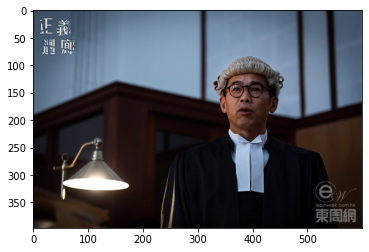

In [7]:
import matplotlib.pyplot as plt
filename = "Test3.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

1/1 [==============================] - 0s 115ms/step


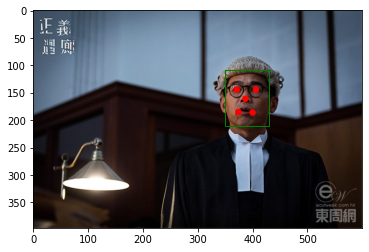

In [8]:
# draw an image with detected objects
def draw_facebox(filename,result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image 
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box 
    for result in result_list:
        # get coordinates
        x,y,width,height = result['box']
        #create the shape
        rect = plt.Rectangle((x,y),width,height,fill = False,color = 'green')
        #draw the box 
        ax.add_patch(rect)
        for key,value in result['keypoints'].items():
            # create and draw dot 
            dot = plt.Circle(value,radius=5,color='red')
            ax.add_patch(dot)
        #show the plot
        plt.show()


filename = "Test3.jpg"
#load image from file
pixels = plt.imread(filename)
detector = mtcnn.MTCNN()
#detect faces in the image
faces = detector.detect_faces(pixels)
#display faces on the original image 
draw_facebox(filename,faces)



In [9]:
INPUT_IMAGE = 'Test3.jpg'
OUTPUT_IMAGE = 'Test5.png'
detector = mtcnn.MTCNN(steps_threshold=[0.0, 0.0, 0.0])

def landmarks(img):
    faces = detector.detect_faces(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    face = max(faces, key=lambda x: x['confidence'])
    return face['keypoints']

def affineMatrix(lmks, scale=2.5):
    nose = np.array(lmks['nose'], dtype=np.float32)
    left_eye = np.array(lmks['left_eye'], dtype=np.float32)
    right_eye = np.array(lmks['right_eye'], dtype=np.float32)
    eye_width = right_eye - left_eye
    angle = np.arctan2(eye_width[1], eye_width[0])
    center = nose
    alpha = np.cos(angle)
    beta = np.sin(angle)
    w = np.sqrt(np.sum(eye_width**2)) * scale
    m = [[alpha, beta, -alpha * center[0] - beta * center[1] + w * 0.5],
        [-beta, alpha, beta * center[0] - alpha * center[1] + w * 0.5]]
    return np.array(m), (int(w), int(w))

img = cv2.imread(INPUT_IMAGE)
mat, size = affineMatrix(landmarks(img))
cv2.imwrite(OUTPUT_IMAGE, cv2.warpAffine(img, mat, size))

1/1 [==============================] - 0s 101ms/step


254/254 [==============================] - 7s 28ms/step


True